# Student Score Prediction

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, RobustScaler
import warnings
warnings.filterwarnings("ignore")

In [5]:
df=pd.read_csv('/kaggle/input/student-performance-factors/StudentPerformanceFactors.csv')

## Pre-Processing

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

In [7]:
df.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


In [8]:
print(f'There are {df.duplicated().sum()} duplicated rows')

There are 0 duplicated rows


<Axes: xlabel='Hours_Studied', ylabel='Exam_Score'>

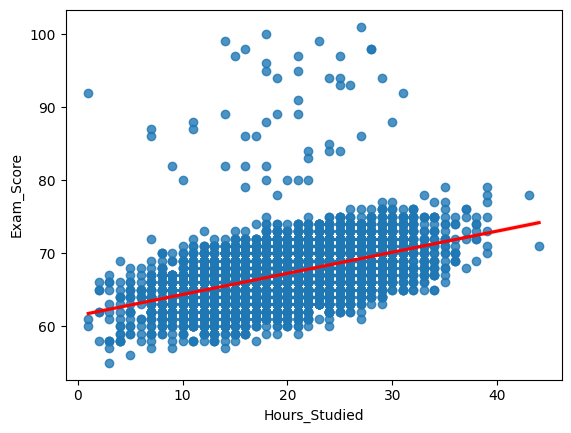

In [9]:
sns.regplot(x='Hours_Studied',y='Exam_Score',data=df,line_kws={'color':'red'})

In [10]:
for col in df.select_dtypes(include="object").columns:
    df[col] = df[col].astype("category")

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   Hours_Studied               6607 non-null   int64   
 1   Attendance                  6607 non-null   int64   
 2   Parental_Involvement        6607 non-null   category
 3   Access_to_Resources         6607 non-null   category
 4   Extracurricular_Activities  6607 non-null   category
 5   Sleep_Hours                 6607 non-null   int64   
 6   Previous_Scores             6607 non-null   int64   
 7   Motivation_Level            6607 non-null   category
 8   Internet_Access             6607 non-null   category
 9   Tutoring_Sessions           6607 non-null   int64   
 10  Family_Income               6607 non-null   category
 11  Teacher_Quality             6529 non-null   category
 12  School_Type                 6607 non-null   category
 13  Peer_Influence    

In [12]:
df.isna().sum()

Hours_Studied                  0
Attendance                     0
Parental_Involvement           0
Access_to_Resources            0
Extracurricular_Activities     0
Sleep_Hours                    0
Previous_Scores                0
Motivation_Level               0
Internet_Access                0
Tutoring_Sessions              0
Family_Income                  0
Teacher_Quality               78
School_Type                    0
Peer_Influence                 0
Physical_Activity              0
Learning_Disabilities          0
Parental_Education_Level      90
Distance_from_Home            67
Gender                         0
Exam_Score                     0
dtype: int64

### Handle missing values

In [14]:
df['Teacher_Quality']=df['Teacher_Quality'].fillna(df['Teacher_Quality'].mode()[0])
df['Parental_Education_Level']=df['Parental_Education_Level'].fillna(df['Parental_Education_Level'].mode()[0])
df['Distance_from_Home']=df['Distance_from_Home'].fillna(df['Distance_from_Home'].mode()[0])

In [15]:
df.isna().sum()

Hours_Studied                 0
Attendance                    0
Parental_Involvement          0
Access_to_Resources           0
Extracurricular_Activities    0
Sleep_Hours                   0
Previous_Scores               0
Motivation_Level              0
Internet_Access               0
Tutoring_Sessions             0
Family_Income                 0
Teacher_Quality               0
School_Type                   0
Peer_Influence                0
Physical_Activity             0
Learning_Disabilities         0
Parental_Education_Level      0
Distance_from_Home            0
Gender                        0
Exam_Score                    0
dtype: int64

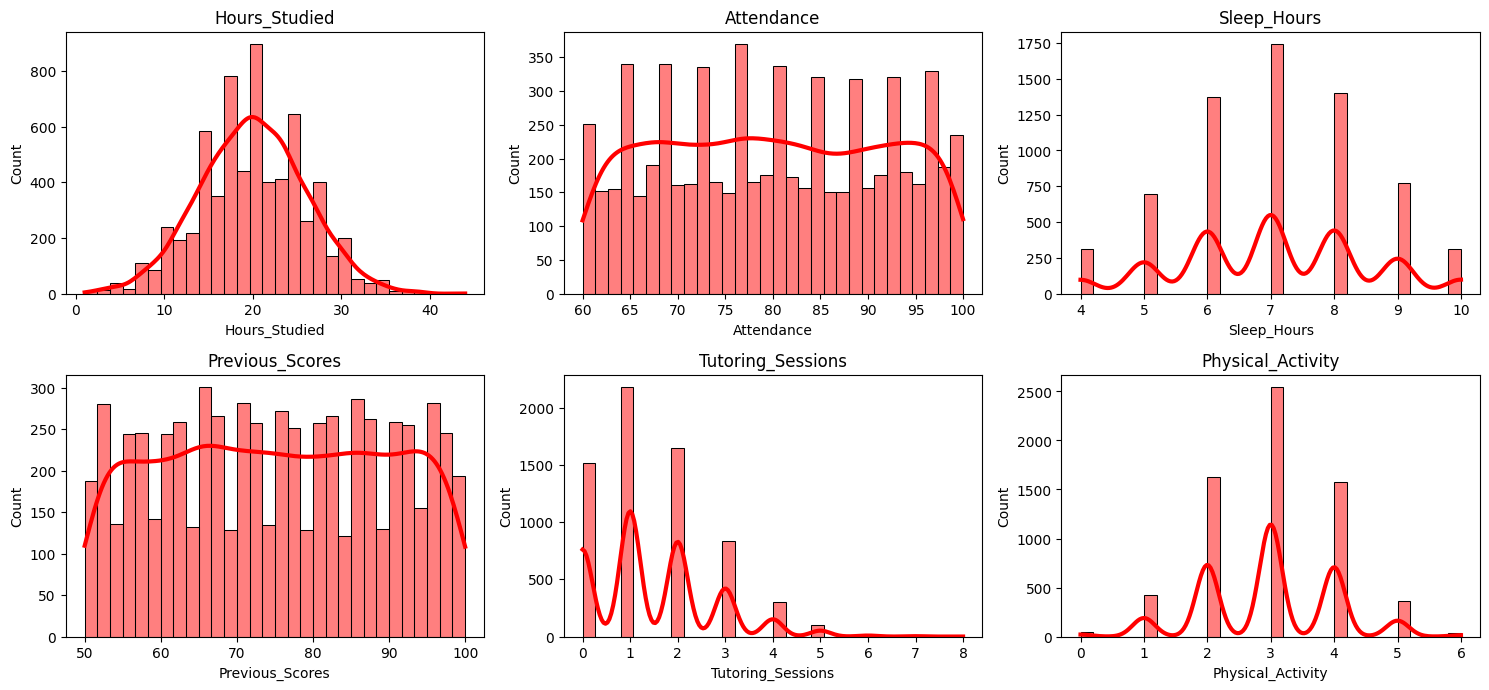

In [16]:
numerical_cols = ['Hours_Studied', 'Attendance', 'Sleep_Hours',
                  'Previous_Scores', 'Tutoring_Sessions',
                  'Physical_Activity']

plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(3, 3, i)
    sns.histplot(df[col],
                 kde=True,
                 bins=30,
                 color="red",
                 line_kws={"linewidth": 3}
                )
    plt.title(col)



plt.tight_layout()
plt.show()

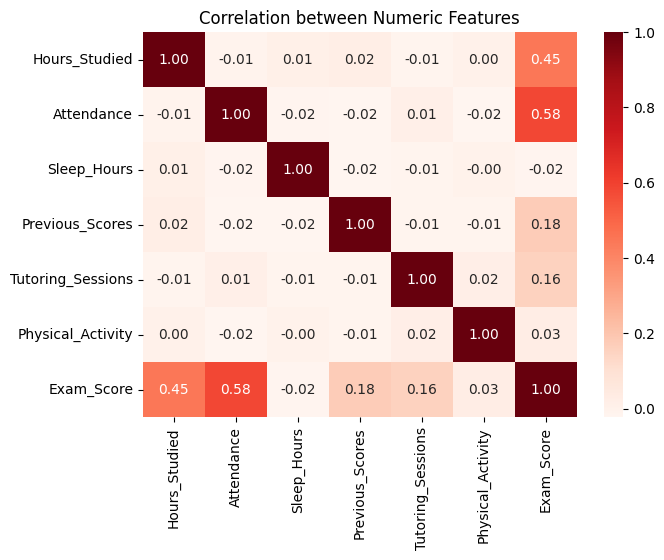

In [17]:
# Select numeric columns for correlation
cols = ['Hours_Studied', 'Attendance', 'Sleep_Hours',
        'Previous_Scores', 'Tutoring_Sessions',
        'Physical_Activity', 'Exam_Score']

# Compute correlation matrix
corr = df[cols].corr()

# Plot heatmap with red shades
plt.figure(figsize=(7, 5))
sns.heatmap(corr, annot=True, cmap="Reds", fmt=".2f")
plt.title("Correlation between Numeric Features")
plt.show()


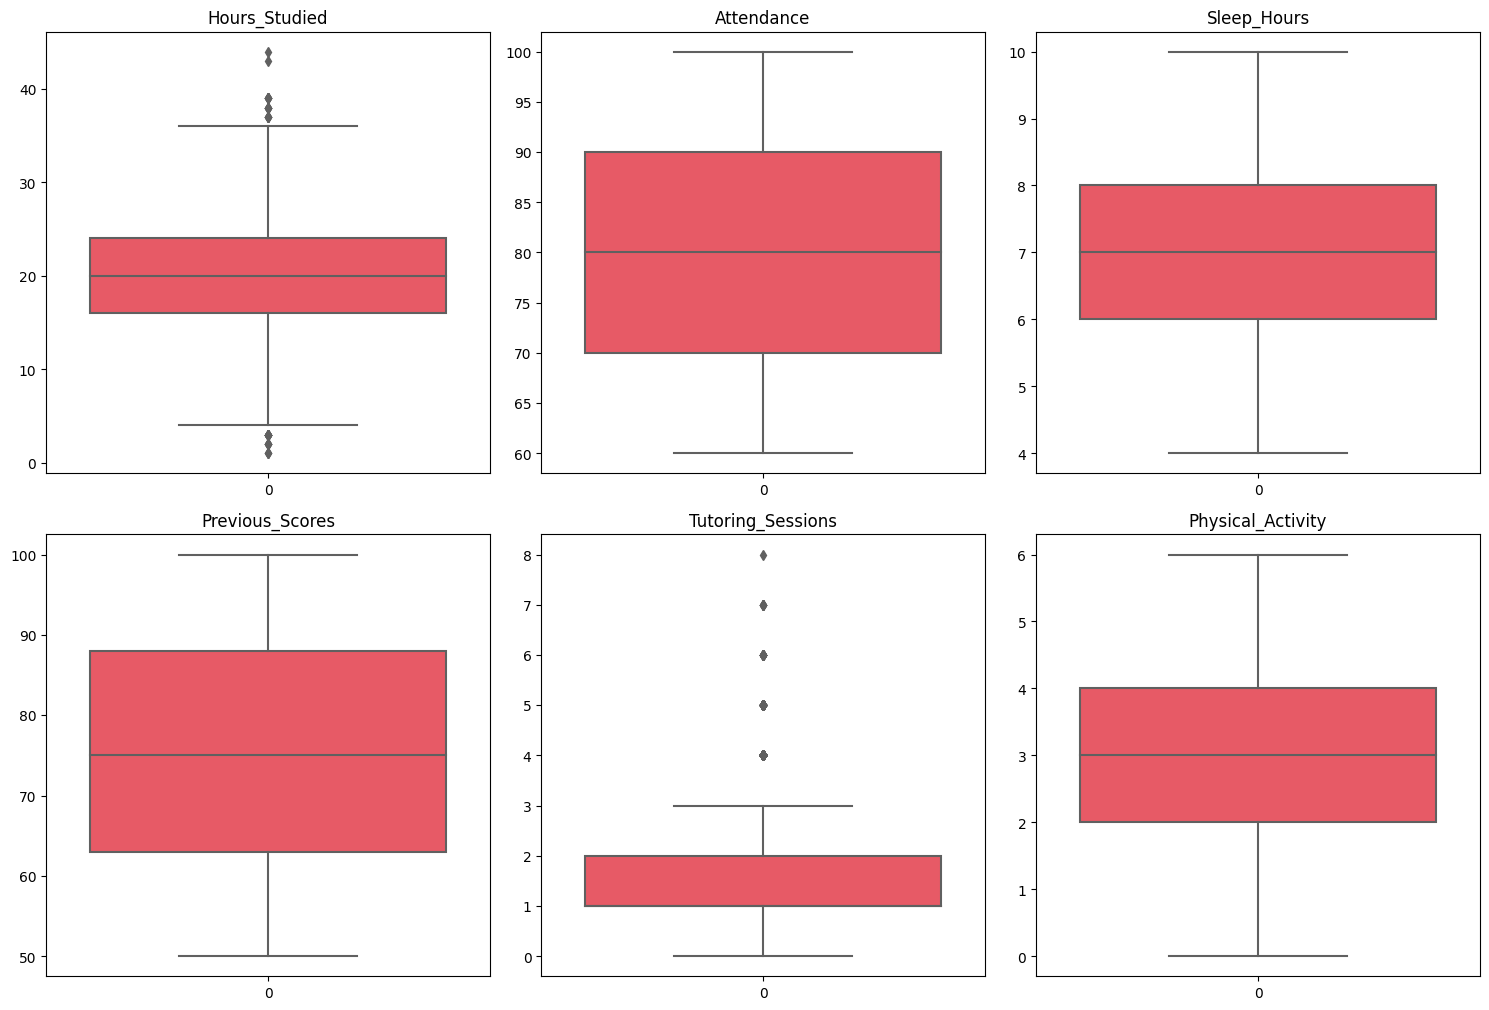

In [19]:
plt.figure(figsize=(15, 15))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(df[col],
                 color="#ff4252",
                )
    plt.title(col)



plt.tight_layout()
plt.show()

### Handling Outliers

In [20]:
# Select numeric columns only
numeric_cols = df.select_dtypes(include=np.number).columns
data_numeric = df[numeric_cols]

# Compute Z-score
z = np.abs((data_numeric - data_numeric.mean()) / data_numeric.std())
threshold = 3

# Keep only rows where all numeric values are within threshold
df_clean = df[(z < threshold).all(axis=1)]

# Check how many rows were removed
print(f"Original rows: {df.shape[0]}")
print(f"Rows after outlier removal: {df_clean.shape[0]}")
print(f"Rows removed: {df.shape[0] - df_clean.shape[0]}")

# Update df
df = df_clean

Original rows: 6607
Rows after outlier removal: 6506
Rows removed: 101


### Data Distribution

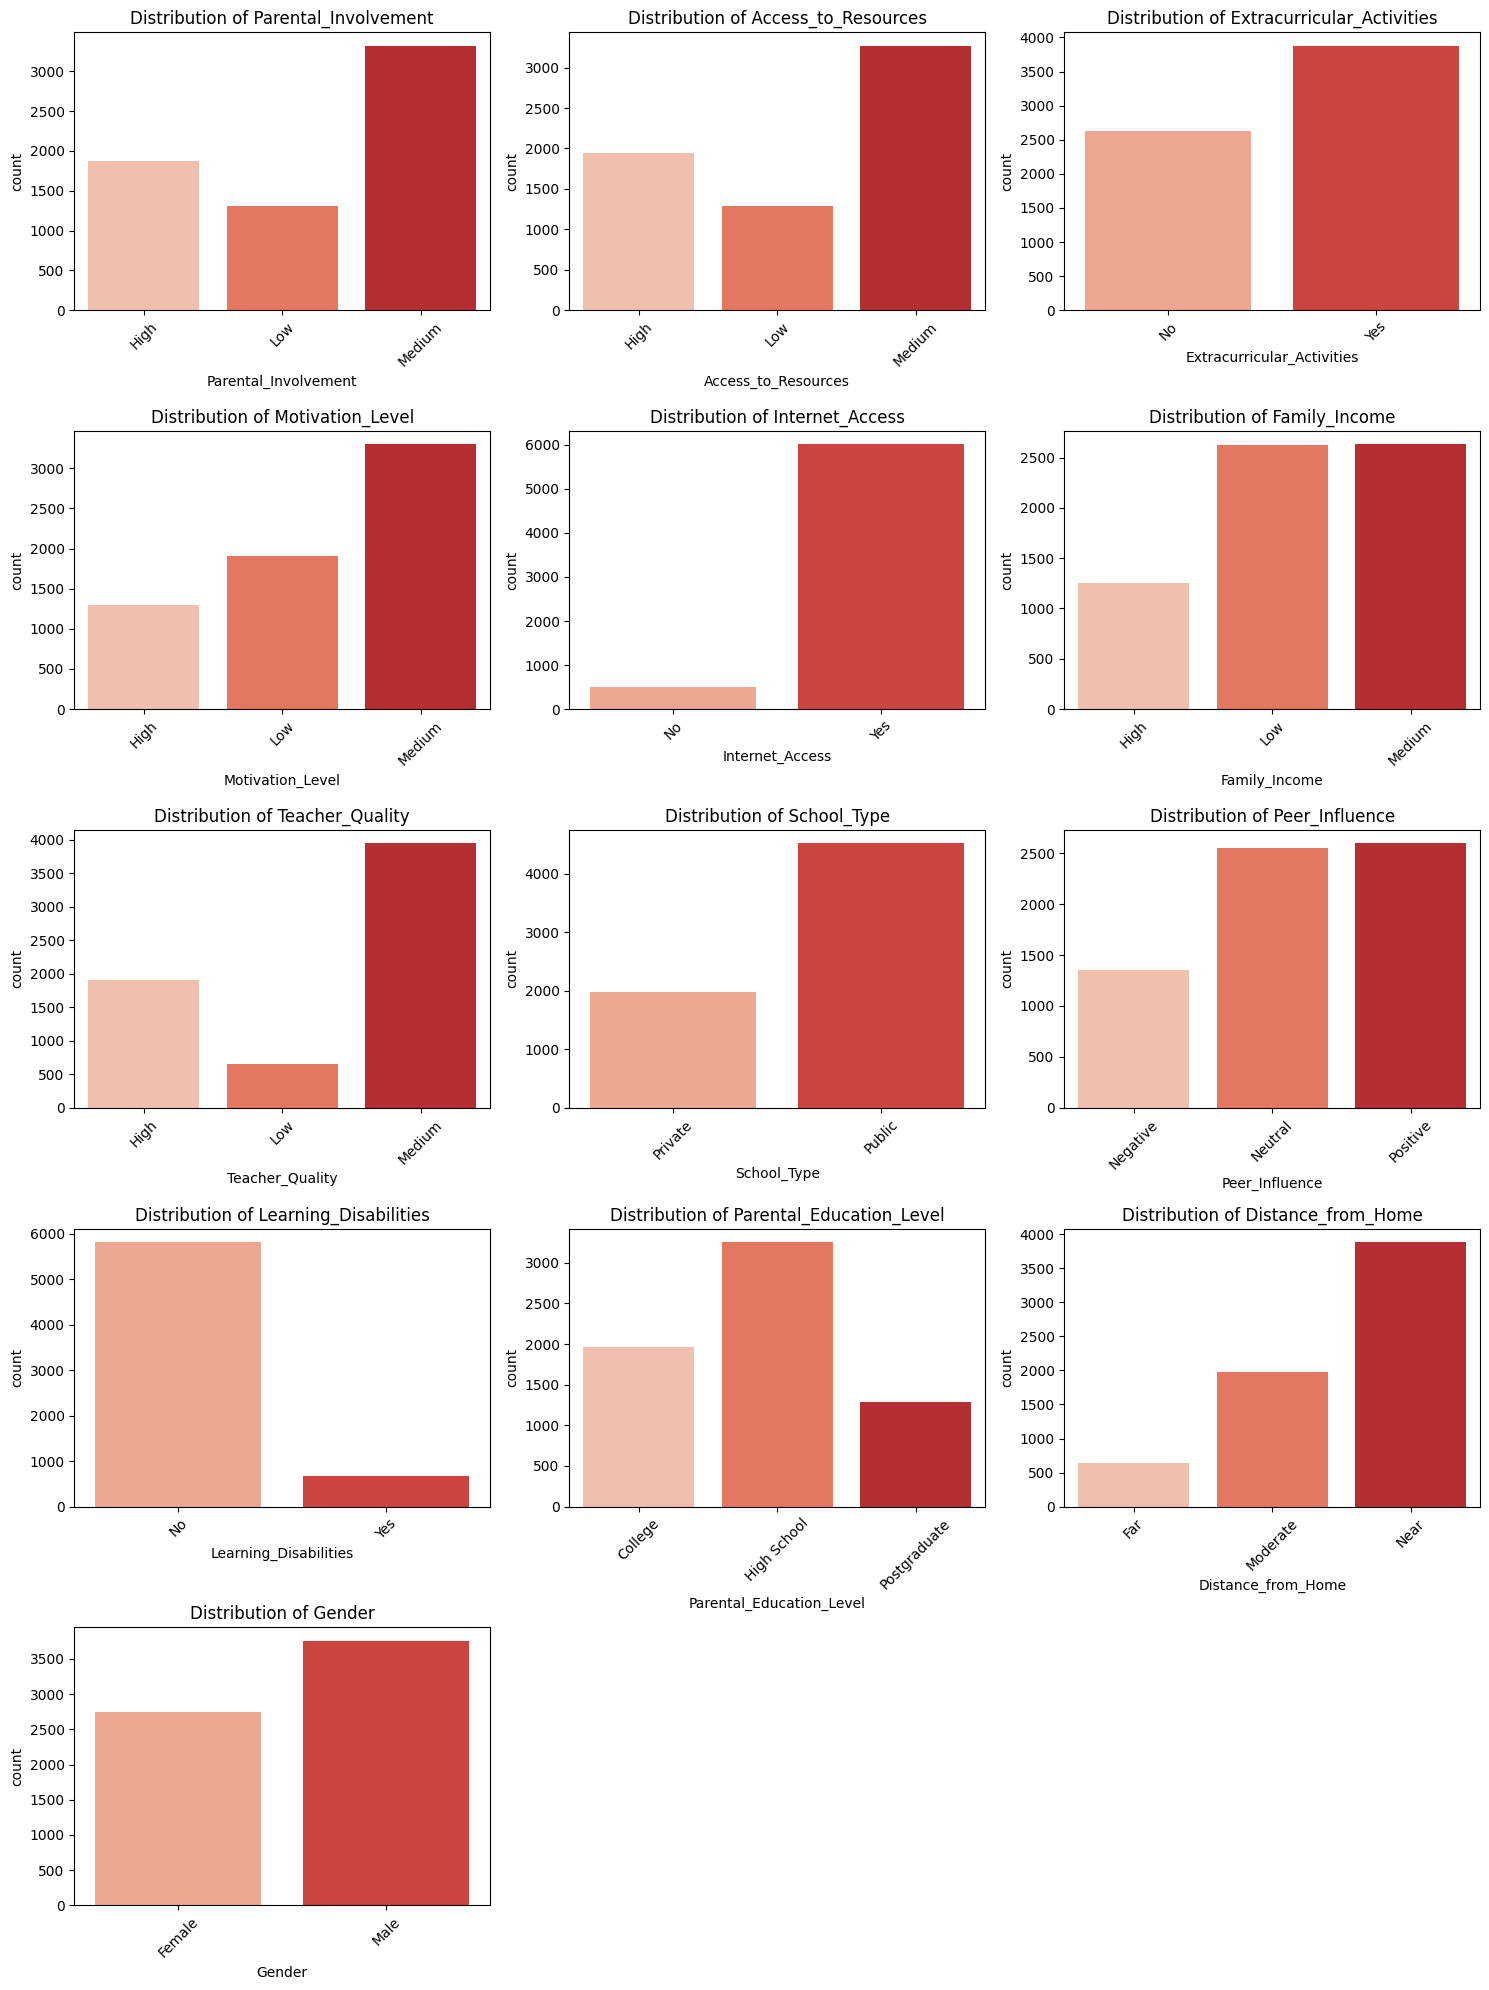

In [21]:
categorical_cols = ['Parental_Involvement', 'Access_to_Resources', 'Extracurricular_Activities',
                    'Motivation_Level', 'Internet_Access', 'Family_Income', 'Teacher_Quality',
                    'School_Type', 'Peer_Influence', 'Learning_Disabilities',
                    'Parental_Education_Level', 'Distance_from_Home', 'Gender']

plt.figure(figsize=(15, 20))
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(5, 3, i)
    sns.countplot(data=df, x=col, palette='Reds')
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

## Model Training

In [22]:
# List all categorical columns
categorical_columns = [
    'Gender','Internet_Access','Extracurricular_Activities','Learning_Disabilities',
    'Parental_Involvement','Access_to_Resources','Peer_Influence',
    'Parental_Education_Level','Distance_from_Home','Motivation_Level',
    'Teacher_Quality','Family_Income','School_Type'
]

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Apply Label Encoding to all categorical columns
for col in categorical_columns:
    df[col] = label_encoder.fit_transform(df[col])

# Check updated DataFrame
df.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,1,0,0,7,73,1,1,0,1,2,1,2,3,0,1,2,1,67
1,19,64,1,2,0,8,59,1,1,2,2,2,1,0,4,0,0,1,0,61
2,24,98,2,2,1,7,91,2,1,2,2,2,1,1,4,0,2,2,1,74
3,29,89,1,2,1,8,98,2,1,1,2,2,1,0,4,0,1,1,1,71
4,19,92,2,2,1,6,65,2,1,3,2,0,1,1,4,0,0,2,0,70


In [25]:
x=df.drop(['Exam_Score'], axis=1)
y = df['Exam_Score']

In [26]:
scaler = RobustScaler()
robust_scaled = scaler.fit_transform(x)
robust_scaled_df = pd.DataFrame(robust_scaled, columns=x.columns)

In [27]:
robust_scaled_df

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender
0,0.375,0.20,-0.5,-1.0,-1.0,0.0,-0.083333,-1.0,0.0,-1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,-0.125,-0.80,-0.5,0.0,-1.0,0.5,-0.666667,-1.0,0.0,1.0,1.0,0.0,0.0,-1.0,0.5,0.0,-1.0,-1.0,-1.0
2,0.500,0.90,0.0,0.0,0.0,0.0,0.666667,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.5,0.0,1.0,0.0,0.0
3,1.125,0.45,-0.5,0.0,0.0,0.5,0.958333,0.0,0.0,0.0,1.0,0.0,0.0,-1.0,0.5,0.0,0.0,-1.0,0.0
4,-0.125,0.60,0.0,0.0,0.0,-0.5,-0.416667,0.0,0.0,2.0,1.0,-1.0,0.0,0.0,0.5,0.0,-1.0,0.0,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6501,0.625,-0.55,-1.0,0.0,-1.0,0.0,0.041667,0.0,0.0,0.0,-1.0,0.0,0.0,1.0,-0.5,0.0,0.0,0.0,-1.0
6502,0.375,-0.20,-1.0,0.0,-1.0,0.5,0.250000,0.0,0.0,2.0,0.0,-1.0,0.0,1.0,-0.5,0.0,0.0,0.0,-1.0
6503,0.000,0.50,0.0,-0.5,0.0,-0.5,-0.416667,-1.0,0.0,2.0,0.0,0.0,0.0,-1.0,-0.5,0.0,1.0,0.0,-1.0
6504,-1.250,0.30,-1.0,-1.0,0.0,-0.5,0.666667,-2.0,0.0,1.0,0.0,0.0,-1.0,1.0,0.0,0.0,0.0,-2.0,-1.0


Then split the model into 80/20 percentage

In [28]:
x_train, x_test, y_train, y_test =train_test_split(robust_scaled_df, y, test_size =0.2, random_state = 42)


### Linear Regression

In [29]:
# Initialize and train model
model = LinearRegression()
model.fit(x_train, y_train)

# Predictions
y_train_pred = model.predict(x_train)
y_test_pred = model.predict(x_test)

# Evaluation metrics
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)
mae = mean_absolute_error(y_test, y_test_pred)
mse = mean_squared_error(y_test, y_test_pred)
rmse = np.sqrt(mse)




#### Model Evaluation

In [30]:
# Display results
print("\nLinear Regression Model Performance:")
print(f"Train R² Score: {train_r2:.4f}")
print(f"Test R² Score : {test_r2:.4f}")
print(f"MAE           : {mae:.4f}")
print(f"MSE           : {mse:.4f}")
print(f"RMSE          : {rmse:.4f}")



Linear Regression Model Performance:
Train R² Score: 0.8857
Test R² Score : 0.8822
MAE           : 0.8947
MSE           : 1.2341
RMSE          : 1.1109


88% is still a good prediction score but we further proceed to Polynomial regression for more better predictions

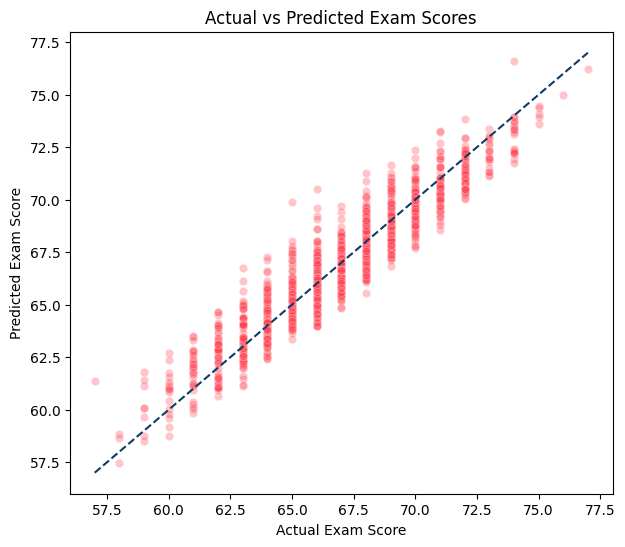

In [31]:
# Scatter Plot: Actual vs Predicted
plt.figure(figsize=(7, 6))
sns.scatterplot(x=y_test, y=y_test_pred, color='#ff4252', alpha=0.3)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='#0d3b66', linestyle='--')
plt.xlabel("Actual Exam Score")
plt.ylabel("Predicted Exam Score")
plt.title("Actual vs Predicted Exam Scores")
plt.show()

### Polynomial Regression

In [32]:
# Polynomial Features (degree=2)
poly_features = PolynomialFeatures(degree=2, include_bias=False)
x_train_poly = poly_features.fit_transform(x_train)
x_test_poly = poly_features.transform(x_test)

# Linear Regression on Polynomial Features
model = LinearRegression()
model.fit(x_train_poly, y_train)

# Predictions
y_train_pred = model.predict(x_train_poly)
y_test_pred = model.predict(x_test_poly)

# Evaluation
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)
mae = mean_absolute_error(y_test, y_test_pred)
mse = mean_squared_error(y_test, y_test_pred)
rmse = np.sqrt(mse)


#### Model Evaluation

In [33]:

print("Polynomial Regression (degree=2) Performance:")
print(f"Train R² : {train_r2:.4f}")
print(f"Test R²  : {test_r2:.4f}")
print(f"MAE      : {mae:.2f}")
print(f"MSE      : {mse:.2f}")
print(f"RMSE     : {rmse:.2f}")

Polynomial Regression (degree=2) Performance:
Train R² : 0.9865
Test R²  : 0.9895
MAE      : 0.27
MSE      : 0.11
RMSE     : 0.33


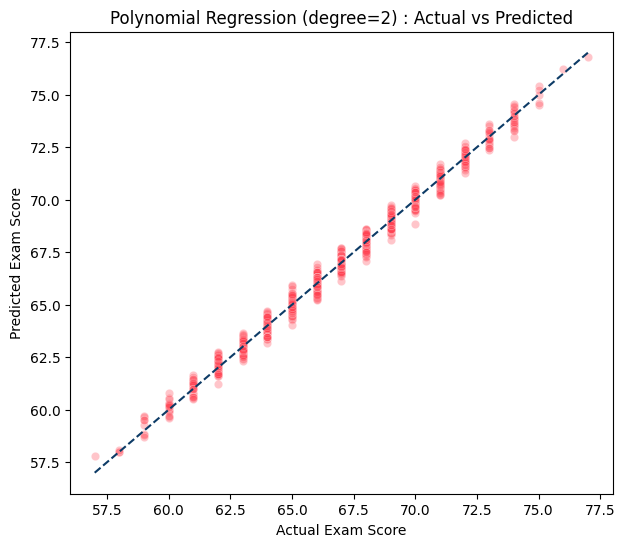

In [34]:
# Scatter Plot: Actual vs Predicted
plt.figure(figsize=(7, 6))
sns.scatterplot(x=y_test, y=y_test_pred, color='#ff4252', alpha=0.3)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='#0d3b66', linestyle='--')  # Ideal line
plt.xlabel("Actual Exam Score")
plt.ylabel("Predicted Exam Score")
plt.title("Polynomial Regression (degree=2) : Actual vs Predicted")
plt.show()